In [212]:
#Imports
import scipy
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import re
import os
import scipy

In [213]:
"""Specify files extension identifiers and parse current directory for csv full paths"""
#File strings [EDITABLE]
layers_ext = "layer"
spt_ext = "spt"
explor_ext = "explor"

#build paths
dir_path = os.getcwd()
file_paths = []
for f in os.listdir(dir_path):
    if f.endswith(".csv"):
        file_paths.append(os.path.join(dir_path, f))

#parse paths
spt_path = [s for s in file_paths if spt_ext in s][0]
lyr_path = [s for s in file_paths if layers_ext in s][0]
explor_path = [s for s in file_paths if explor_ext in s][0]

print("Exploration CSV path:\n{}\n".format(explor_path))
print("SPT N-Value CSV path:\n{}\n".format(spt_path))
print("Geological Layers CSV path:\n{}\n".format(lyr_path))

Exploration CSV path:
/Users/matthew/liqpy/liquepy/test_explor.csv

SPT N-Value CSV path:
/Users/matthew/liqpy/liquepy/test_spt.csv

Geological Layers CSV path:
/Users/matthew/liqpy/liquepy/test_layers.csv



In [214]:
#Read input blowcounts csv
df = pd.read_csv(spt_path, index_col=['OBJECT_ID'])

"""Creates list of full tuples from df"""
def slice_dice(df):
    data_list = []
    for r in df.itertuples():
        data_list.append(r)
    return data_list

nvalue_list = slice_dice(df)

"""Build list of necessary tuples, convert values to floats 
from two df columns for interpolation"""
def three_tuple(somelist):
    #Index
    list_1 = []
    for itup in somelist:
        list_1.append(float(itup[1]))
    #X
    list_2 = []
    for itup in somelist:
        list_2.append(float(itup[2]))
    #Y
    list_3 = []
    for itup in somelist:
        list_3.append(itup[3])
    tuplist = list(zip(list_1, list_2, list_3))
    return tuplist

def two_tuple(somelist):
    """X-value"""
    list_1 = []
    for itup in somelist:
        list_1.append(float(itup[0]))
    """Y-value"""
    list_2 = []
    for itup in somelist:
        list_2.append(float(itup[1]))
    tuplist = list(zip(list_1, list_2))
    return tuplist

def unpack_two_tuple(sometuplelist):
    """X-value"""
    list_1 = []
    for itup in sometuplelist:
        list_1.append(itup[0])
    """Y-value"""
    list_2 = []
    for itup in sometuplelist:
        list_2.append(itup[1])
    return list_1, list_2

itupdata = three_tuple(nvalue_list)

In [215]:
"Group tuples by exploration_id"
import itertools
import operator

def group_tuples(tuple_list, indexing_tuplenumber):
    n_data = [list(group) for key,group in itertools.groupby(tuple_list,operator.itemgetter(indexing_tuplenumber))]
    return n_data

nvalues_data = group_tuples(itupdata,0)
itupdata

[(1.0, 0.0, 12),
 (1.0, 1.0, 10),
 (1.0, 4.0, 26),
 (1.0, 7.0, 55),
 (1.0, 8.0, 45),
 (1.0, 11.0, 60),
 (1.0, 13.0, 51),
 (2.0, 0.0, 8),
 (2.0, 2.0, 30),
 (2.0, 5.0, 45),
 (2.0, 10.0, 52)]

In [216]:
"""Fill in missing n-values for depths 0 to 30 feet"""
from scipy.interpolate import interp1d

"""Build a list of tuples from interpolation with matching exploration number"""
"""Note that the tuple is ungrouped afterwards"""
"""Values outside interpolation bounds will == nan"""
def interpolate_nvalues(nvalues_data):
    nvalue_intp = []
    sizing = np.arange(0,30,0.5)
    for i in range(len(nvalues_data)):
        temp_list = list(zip(*nvalues_data[i]))
        temp_x = temp_list[1]
        temp_y = temp_list[2]
        filling = temp_list[0]
        nvalue_interpolation = interp1d(temp_x, temp_y, bounds_error=False)
        expnum = np.zeros((len(sizing)))
        expnum[expnum == 0] = filling[0]
        tuppp = list(zip(sizing, nvalue_interpolation(sizing), expnum))
        nvalue_intp.extend(tuppp)
    return nvalue_intp

blowcounts = interpolate_nvalues(nvalues_data)

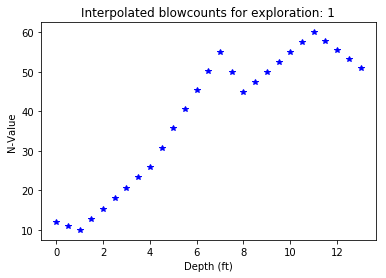

In [217]:
def graph_blowcounts(blowcounts,exploration_number):
    temp_list = []
    for u in blowcounts:
        if u[2] == exploration_number:
            temp_list.append(u)
    i,j = unpack_two_tuple(temp_list)
    plt.plot(i,j,'*b')
    plt.title("Interpolated blowcounts for exploration: "+str(exploration_number))
    plt.xlabel("Depth (ft)")
    plt.ylabel("N-Value")
    return plt.show()

graph_blowcounts(blowcounts,1)

In [218]:
#Read input layers csv
df2 = pd.read_csv(lyr_path, index_col=['OBJECT_ID'])

In [219]:
#Alternate way of slicing, still have not flushed out
ffg = df2[df2.EXPLOR_ID == 1]
ffg = slice_dice(ffg)

In [259]:
"""Build list of necessary tuples, convert values to floats 
from two df columns for interpolation"""
def five_tuple(somelist):
    #Index
    list_1 = []
    for itup in somelist:
        list_1.append(float(itup[1]))
    #X1
    list_2 = []
    for itup in somelist:
        list_2.append(float(itup[2]))
    #X2
    list_3 = []
    for itup in somelist:
        list_3.append(float(itup[3]))
    #Y1
    list_4 = []
    for itup in somelist:
        list_4.append(itup[4])
    #Y2
    list_5 = []
    for itup in somelist:
        list_5.append(itup[5])
    tuplist = list(zip(list_1, list_2, list_3, list_4, list_5))
    return tuplist

In [266]:
df2_slice = slice_dice(df2)
lyr_iterdata = five_tuple(df2_slice)
lyr_data = group_tuples(lyr_iterdata,0)

'SP'

In [222]:
#Read csv and convert saturated unit density table to dictionary
#Convert to float
den_df = pd.read_csv('Sat_UnitDensity.csv', index_col='UID')
den_df_key = den_df.keys()[0]

def pd_to_dict(df, key):
    key_names = df.keys() 
    df = df.to_dict()
    df = df[key]
    for value in df.keys():
        df[value] = float(df[value])
    return df

den_dict = pd_to_dict(den_df, den_df_key)
print(den_dict)

{'Qal': 1880.0, 'Qf': 1880.0, 'Ql': 1880.0, 'Qls': 1900.0, 'Qmw': 1900.0, 'Qp': 1880.0, 'Qw': 1880.0, 'Qob': 1880.0, 'Qpf': 2000.0, 'Qpff': 2000.0, 'Qpfn': 2000.0, 'Qpfnc': 2000.0, 'Qpfnf': 2000.0, 'Qpoc': 2000.0, 'Qpog': 2000.0, 'Qpogt': 2000.0, 'Qpon': 2000.0, 'Qponc': 2000.0, 'Qgpc': 1880.0, 'Qcg': 1880.0, 'Qva': 1920.0, 'Qvi': 1880.0, 'Qvlc': 2000.0, 'Qvr': 1880.0, 'Qvrl': 1880.0, 'Qvrlb': 1880.0, 'Qvrlbt': 1880.0, 'Qvrlf': 1880.0, 'Qvrlj': 1880.0, 'Qvel': 1880.0, 'Qvrlr': 1880.0, 'Qvrlt': 1880.0, 'Qvt': 1880.0, 'Qga': 1920.0, 'Qga(t)': 1920.0, 'Qgt': 1880.0, 'Qgo': 1880.0, 'Qgu': 1880.0}


In [273]:
"""Build a list of tuples from interpolation with matching exploration number"""
"""Note that the tuple is ungrouped afterwards"""
"""Values outside interpolation bounds will == nan"""
#get density values
#newlist = [den_dict[i[4]] for i in lyr_iterdata]
#print(newlist)

def fill_lyrs(data, density_list):
    master_array = np.empty()
    for i in range(len(data)):
        expnum = data[i][0]
        x1 = data[i][1]
        x2 = data[i][2]
        uscs = data[i][3]
        uid = data[i][4]
        dens = density_list[i]
        sizing = np.arange(x1,x2,0.5)
        str_array = np.chararray((1,len(sizing)))
        flt_array = np.zeros(len(sizing))
        density = str_array.copy()
        density[:] = dens
        #expnum = np.zeros((len(sizing)))
        #expnum[expnum == 0] = filling[0]
        #tuppp = list(zip(sizing, density, expnum))
        #lyr_intp.extend(tuppp)
    return len(sizing)

layers = fill_lyrs(df2_slice, newlist)
print(layers)

6


In [224]:
new_list = [(a,b,c,d,e,den_dict[f]) for (a,b,c,d,e,f) in lyr_iterdata]

ValueError: not enough values to unpack (expected 6, got 5)

In [230]:
fines_content = {
('SW','SP','GW','GP'):0.045,
('SW-SM','SW-SC','SP-SM','SP-SC'):0.115,
('SW-GM','SW-GC','SP-GM','SP-GC'):0.115,
('GW-SM','GW-SC','GP-SM','GP-SC'):0.115,
('GW-GM','GW-GC','GP-GM','GP-GC'):0.115,
('SM-SC','SC-SM'):0.25,
('GM-GC','GC-GM'):0.25,
('SM','GM'):0.3,
('SC','GC'):0.2}

[1920.0, 1920.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 1880.0, 1880.0, 1900.0]


In [227]:
from itertools import chain

def get_density(lyr_data):
    for g in lyr_data:
        density_values = tuple([den_dict[g[4]] for g in lyr_data])
    lyr_data += density_values
    return lyr_data

densities = get_density(lyr_iterdata)
print(list(densities))

[(1.0, 0.0, 1.0, 'SP', 'Qva'), (1.0, 1.0, 4.0, 'SP-SM', 'Qva'), (1.0, 4.0, 7.0, 'ML', 'Qvlc'), (1.0, 7.0, 8.0, 'ML-CL', 'Qvlc'), (1.0, 8.0, 11.0, 'CL-CH', 'Qvlc'), (1.0, 11.0, 13.0, 'CH', 'Qvlc'), (1.0, 13.0, 19.0, 'SP', 'Qpfn'), (2.0, 0.0, 2.0, 'SP-SW', 'Qal'), (2.0, 2.0, 5.0, 'SP', 'Qal'), (2.0, 5.0, 8.0, 'CL-CH', 'Qls'), 1920.0, 1920.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 1880.0, 1880.0, 1900.0]


In [270]:
df2_slice[1]

Pandas(Index=4, EXPLOR_ID=1, UPPER_D=1, LOWER_D=4, USCS_CLASS='SP-SM', UID='Qva', DENSITY=0)